In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [53]:
#ENG23CS0158

In [54]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,auc

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
df1=df.drop(columns=['Name','Cabin'])

In [58]:
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [60]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [61]:
df1.fillna({"Age": df1["Age"].median()}, inplace=True)
df1['Embarked'] = df1['Embarked'].fillna(df1['Embarked'].mode()[0])
df1['Fare'] = df1['Fare'].fillna(df1['Fare'].median())

In [62]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

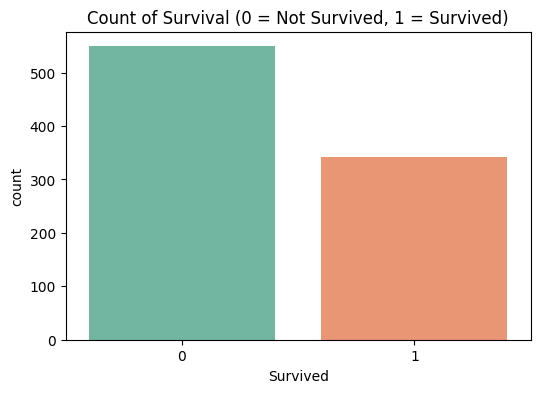

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df1, palette='Set2')
plt.title("Count of Survival (0 = Not Survived, 1 = Survived)")
plt.show()


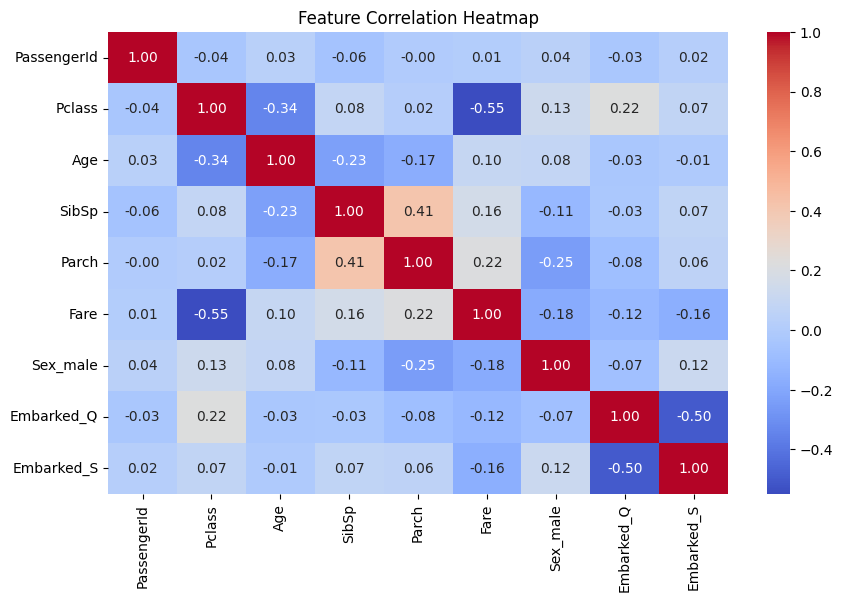

In [64]:

plt.figure(figsize=(10,6))
corr_matrix = x_encoded.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [65]:
x = df1.drop(columns=['Survived','Ticket'])
y = df1['Survived']

In [66]:
x.dtypes
x_encoded = pd.get_dummies(x, columns=['Sex', 'Embarked'], drop_first=True)
print(x_encoded.head())

   PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0            1       3  22.0      1      0   7.2500      True       False   
1            2       1  38.0      1      0  71.2833     False       False   
2            3       3  26.0      0      0   7.9250     False       False   
3            4       1  35.0      1      0  53.1000     False       False   
4            5       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [67]:
 x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=42, stratify=y)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [69]:
model=LogisticRegression(max_iter=2000)
model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=2000)

In [70]:
y_pred = model.predict(x_test_scaled)

In [71]:
acc=accuracy_score(y_test,y_pred)
print("Accuracy: ",acc)

Accuracy:  0.7947761194029851


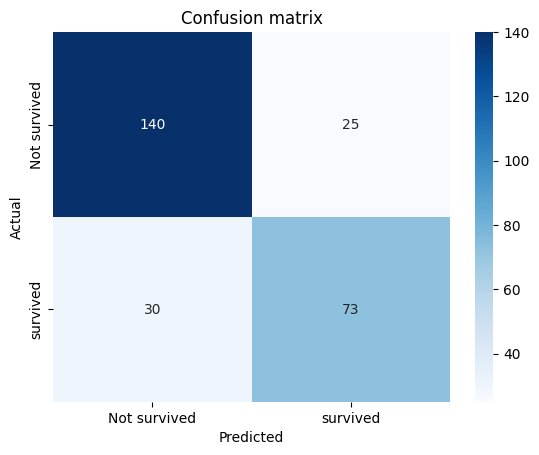

In [72]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,fmt='d',cmap="Blues",xticklabels=["Not survived","survived"],yticklabels=["Not survived","survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

In [73]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       165
           1       0.74      0.71      0.73       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


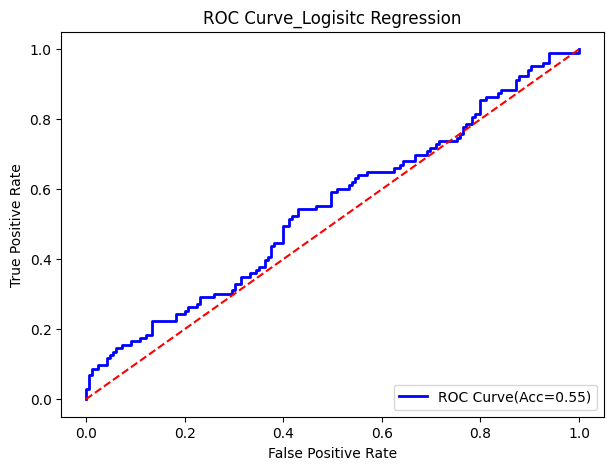

In [74]:
y_prob=model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,color="blue",lw=2,label="ROC Curve(Acc=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='red',linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve_Logisitc Regression")
plt.legend(loc="lower right")
plt.show()